In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
with open('일반에너지드링크.json') as json_file:
    json_data = json.load(json_file)

In [4]:
df = pd.DataFrame(json_data['data'])

In [5]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,[몬스터 에너지 평소에도 자주 마시는데 이번에 울트라 파라다이스가 국내에서 5번째로...,"[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 7월 23일,"[35,877]"
1,1,[촬영할때마다 찾게되는 몬스터 에너지 !\n...,"[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 7월 24일,"[14,414]"
2,2,[#유료광고\n요즘 너무 바쁜 하루를 보내지만\n몬스터 에너지로 충전하고 다시 파이...,"[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 9월 16일,"[10,475]"
3,3,[#유료광고 몬스터 에너지에서 도착한 선물...,"[유료광고, 몬스터에너지, MonsterEnergy, 울ᄐ...",[],2020년 9월 10일,"[11,391]"
4,4,"[.\n새로 나온 몬스터 에너지 울트라 파라다이스 존맛탱,,,,\n키위랑 라임 맛에...","[유료광고, 몬스터에너지, MonsterEnergy, 울트라파라다이스, 나만의파라다...",[],2020년 7월 24일,"[2,407]"
...,...,...,...,...,...,...
36692,36692,[],[],[],[],[]
36693,36693,[],[],[],[],[]
36694,36694,[],[],[],[],[]
36695,36695,[],[],[],[],[]


# Hashtags 분석

# 1. Word Cloud

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [85]:
tags = [element for array in list(df.Hashtags) for element in array]

In [86]:
tags[0:5]

['유료광고', '몬스터에너지', 'MonsterEnergy', '울트라파라다이스', '나만의파라다이스']

In [87]:
ged_stop_words = ['error', '', '에너지드링크', '몬스터에너지', '레드불', '핫식스', 'monsterenergy', 'redbull', \
                 '몬스터']

In [88]:
cv = CountVectorizer(max_features=10000, stop_words = ged_stop_words)

In [89]:
tdm = cv.fit_transform(tags)

In [90]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [91]:
word_count.sort_values('빈도', ascending=False).head(10)

,단어,빈도
7783,일상,4398
3859,다이어트,2405
4127,데일리,2276
6001,소통,2259
7281,운동,2132
4720,맞팔,1963
7332,운동하는여자,1814
4116,데이바이핏,1733
573,dayxfit,1718
550,daily,1686


In [92]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [93]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

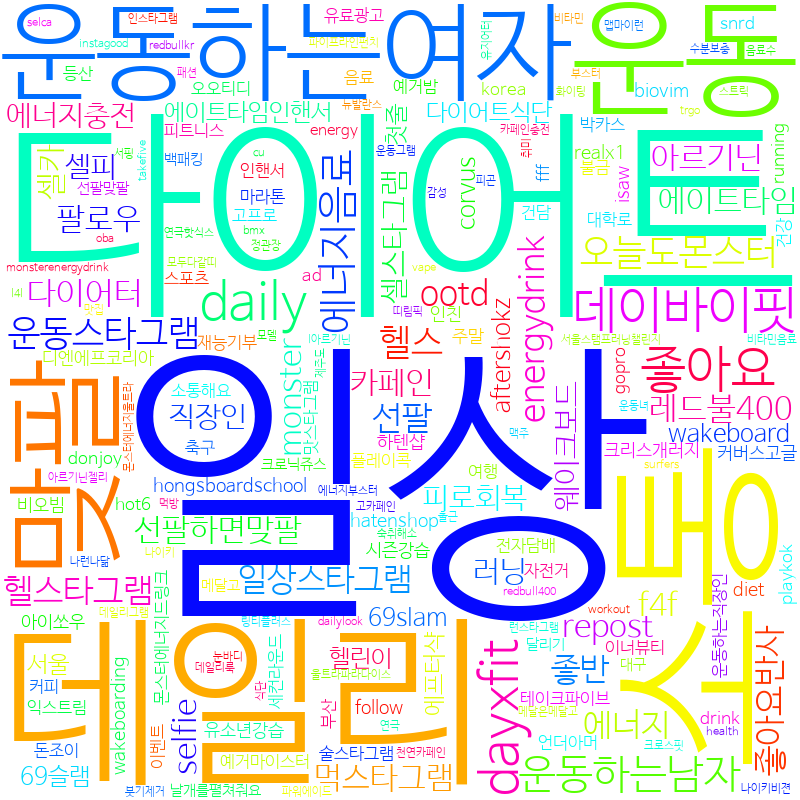

In [94]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [95]:
tdm.shape

(552443, 10000)

In [96]:
# one hot encoding
import numpy as np

one_hot = np.eye(10000)

In [97]:
words = cv.get_feature_names()

In [98]:
tokens = tags

In [99]:
%%time
doc = np.zeros((1, 10000))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 4min 5s


In [100]:
from sklearn.decomposition import TruncatedSVD

In [101]:
svd = TruncatedSVD(n_components=1000)

In [102]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [103]:
svd.components_.shape

(1000, 10000)

In [104]:
word_emb = svd.components_.T

In [105]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 7783
다이어트 3859
데일리 4127
소통 6001
운동 7281
맞팔 4720
운동하는여자 7332
데이바이핏 4116
dayxfit 573
daily 550
좋아요 8173
운동하는남자 7327
에너지음료 6870
오늘도몬스터 7106
헬스 9735
운동스타그램 7300
레드불 2303
선팔 5898
헬스타그램 9748
좋아요반사 8178
energydrink 663
일상스타그램 7796
ootd 1427
에너지 6847
좋반 8166
다이어터 3855
레드불400 4424
에이트타임 6902
monster 1301
먹스타그램 4801
selfie 1686
팔로우 9157
아르기닌 6500
선팔하면맞팔 5905
f4f 686
카페인 8678
셀카 5969
repost 1625
셀스타그램 5968
러닝 4379
에너지드링크 2534
에너지충전 6874
피로회복 9424
직장인 8326
웨이크보드 7433
에이트타임인핸서 6910
셀피 5975
몬스터에너지 2352
다이어트식단 3882
헬린이 9726
서울 5828
wakeboard 2060
첫줄 8461
69slam 180
aftershokz 232
69슬램 181
에프터샥 6921
커버스고글 8750
유소년강습 7491
corvus 502
디엔에프코리아 4274
wakeboarding 2061
시즌강습 6325
hongsboardschool 957
realx1 1581
크리스개러지 8895
아이쏘우 6575
isaw 1034
하텐샵 9545
hatenshop 906
diet 587
인친 7737
비오빔 5600
biovim 339
주말 8199
follow 740
gopro 828
고프로 3220
테이크파이브 9001
음료 7552
돈조이 4182
donjoy 610
스포츠 6268
전자담배 8003
재능기부 7943
오오티디 7163
피트니스 9452
ad 226
익스트림 7679
부산 5428
자전거 7867
술스타그램 6128
등산 4262
이너뷰티 7599

In [106]:
word_emb = svd.components_.T

In [107]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [108]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 1min 39s


68

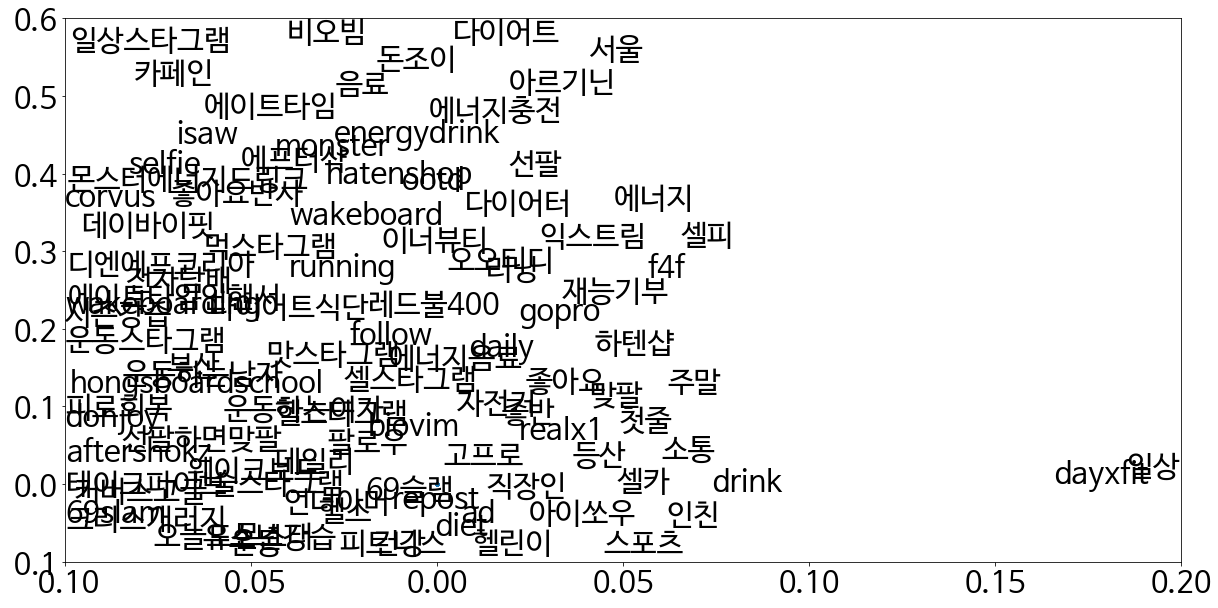

In [109]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

pyplot.xlim(-0.1, 0.2)
pyplot.ylim(-0.1, 0.6)

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [110]:
from sklearn.manifold import TSNE

In [111]:
tsne = TSNE()

In [112]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 13min 15s


44

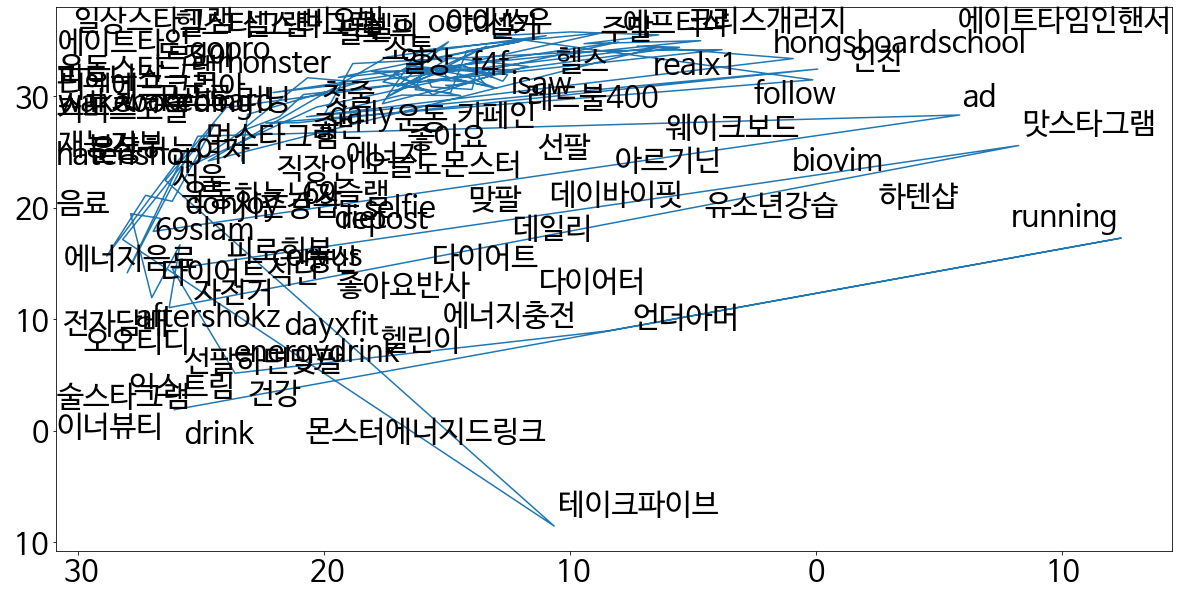

In [126]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1])

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [114]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [115]:
sentences = list(df['Hashtags'])

In [121]:
model = Word2Vec(sentences, size = 1000, min_count = 250, workers = 4, window = 100) # negative, sg

In [122]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [123]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [129]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 15)

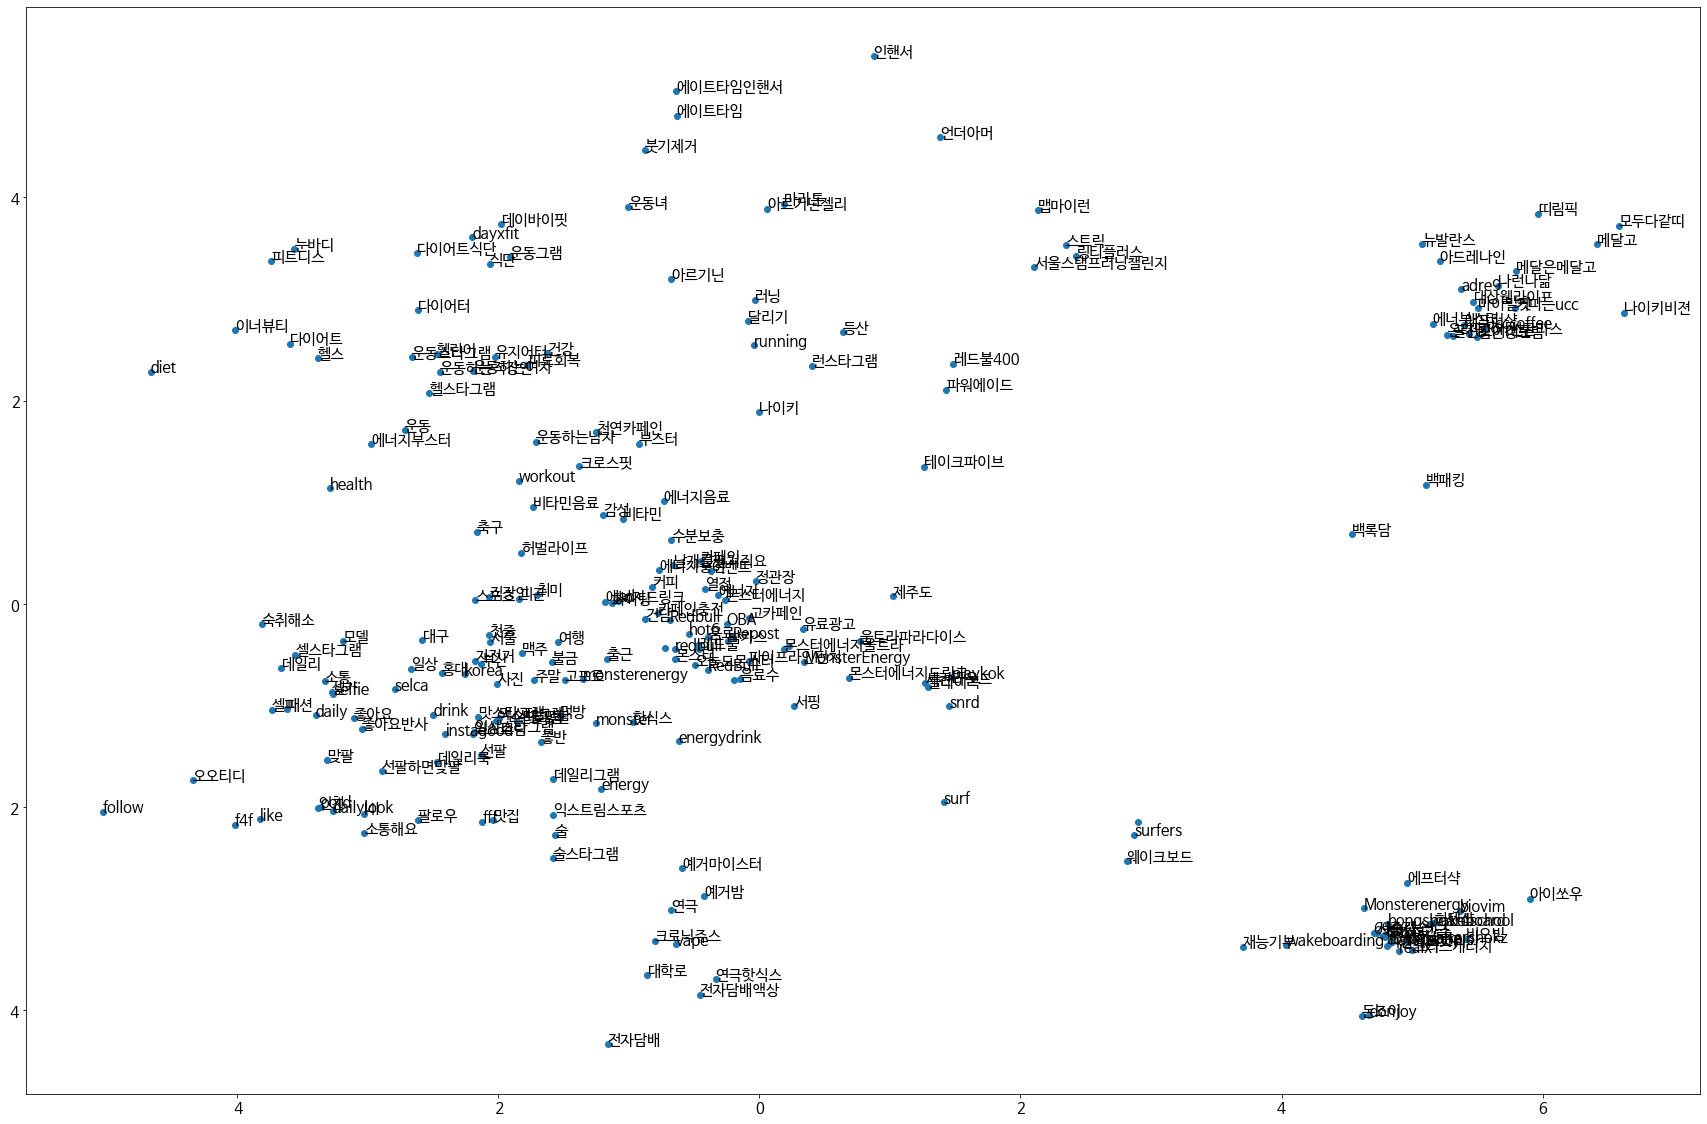

In [130]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [58]:
locates = [element for array in list(df.Locates) for element in array]

In [59]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [60]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
1324,seoul,949
807,jeju,177
244,busan,161
443,do,161
172,beach,150


In [61]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [62]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

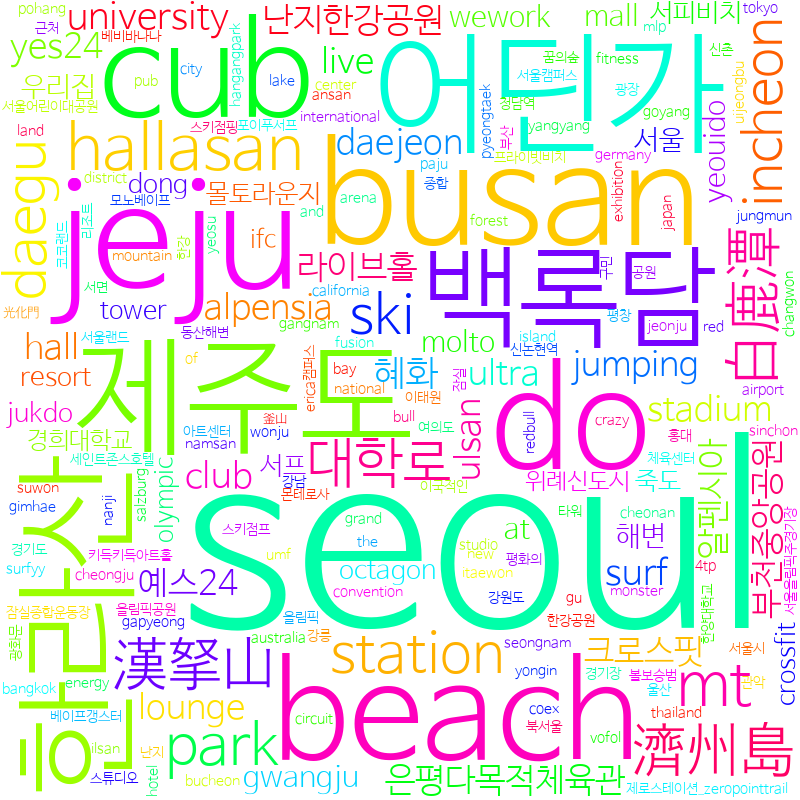

In [63]:
cloud.to_image()

## - Embedding

- LSA

In [64]:
tdm.shape

(10117, 4995)

In [65]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [66]:
words = cv.get_feature_names()
tokens = locates

In [67]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 1.42 s


In [68]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

Wall time: 7.66 s


TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [69]:
svd.components_.shape

(1000, 4995)

In [70]:
word_emb = svd.components_.T

In [71]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

seoul 1324
jeju 807
busan 244
do 443
beach 172
어딘가 3656
cub 393
제주도 4226
한라산 4827
백록담 2815
hallasan 656
mt 1043
白鹿潭 1746
濟州島 1743
漢拏山 1741
daegu 408
park 1156
station 1413
대학로 2339
ski 1359
incheon 767
혜화 4901
university 1537
surf 1436
club 348
stadium 1402
알펜시아 3594
alpensia 83
크로스핏 4534
jumping 830
은평다목적체육관 4002
ulsan 1523
난지한강공원 2156
ultra 1524
부천중앙공원 2945
라이브홀 2502
hall 654
yes24 1642
live 934
lounge 942
daejeon 410
예스24 3798
gwangju 634
yeouido 1641
우리집 3885
서울 3154
해변 4861
mall 965
wework 1597
몰토라운지 2701
at 133
molto 1024
jukdo 829
resort 1248
서프 3210
죽도 4269
octagon 1123
dong 446
서피비치 3215
tower 1498
crossfit 389
olympic 1130
ifc 755
경희대학교 1894
위례신도시 3962
제로스테이션_zeropointtrail 4219
강남 1792
서울랜드 3165
coex 354
꿈의숲 2128
jungmun 832
키득키득아트홀 4558
공원 1938
fitness 532
itaewon 788
부산 2918
hotel 727
umf 1525
잠실 4127
올림픽공원 3847
한강공원 4796
타워 4565
서울캠퍼스 3192
홍대 4916
international 780
studio 1422
釜山 1755
4tp 37
cheonan 308
surfyy 1442
동산해변 2428
mlp 1015
gangnam 563
red 1239
salzburg 1284
cen

In [72]:
word_emb = svd.components_.T

In [73]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 52.3 s


54

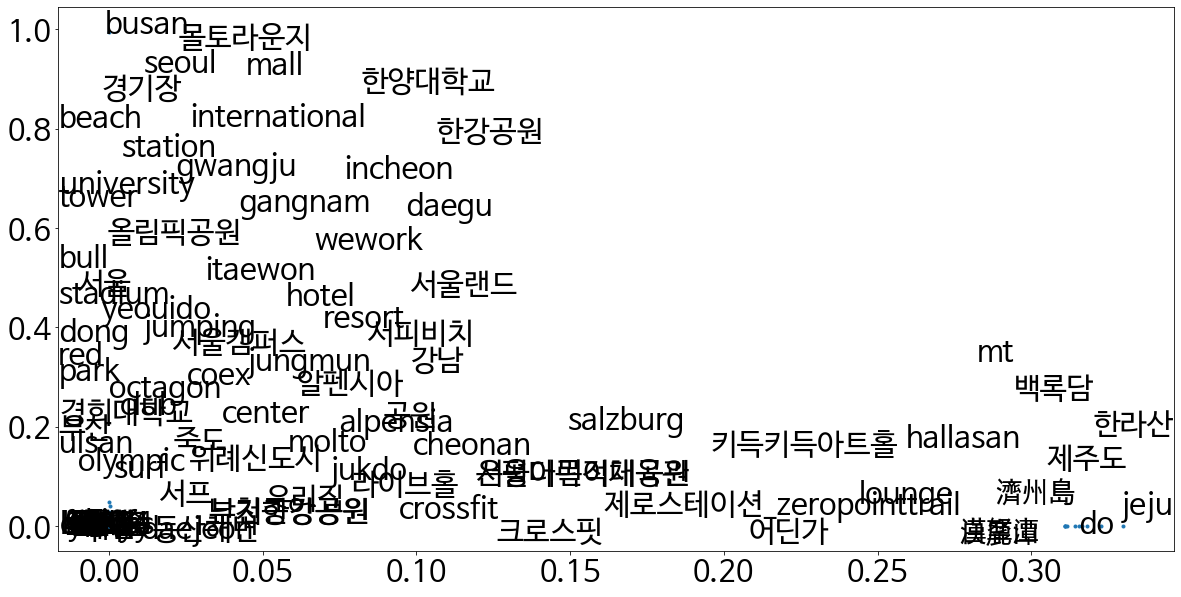

In [74]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [75]:
tsne = TSNE()

In [76]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 2min 27s


58

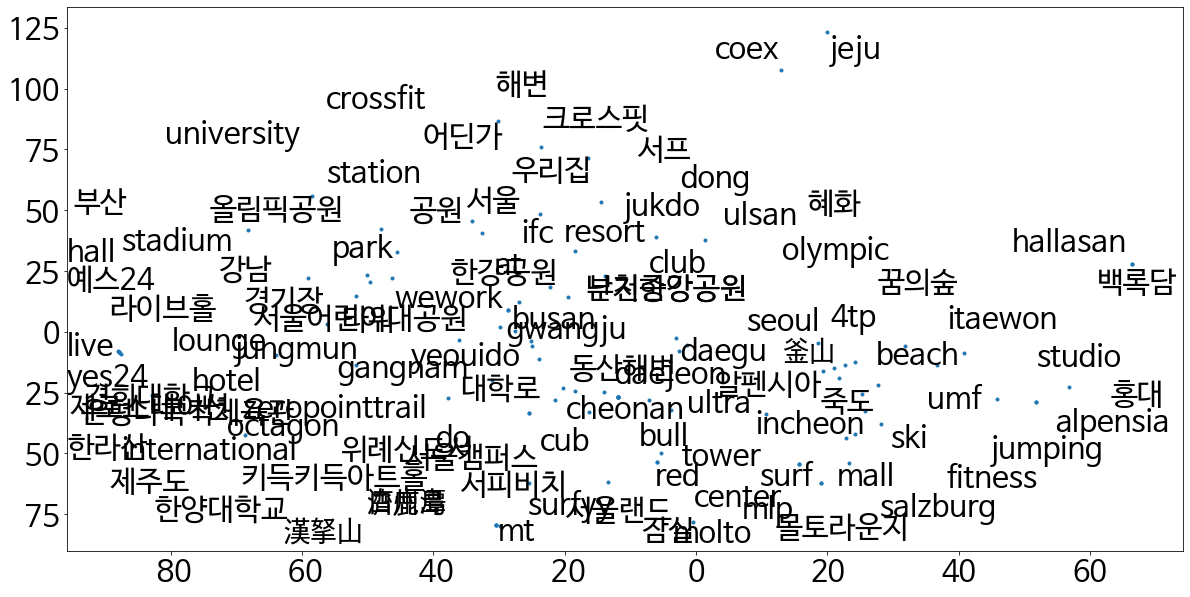

In [77]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [78]:
sentences = list(df['Locates'])

In [79]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [80]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

Wall time: 998 µs


In [81]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

Wall time: 4.02 ms


In [82]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

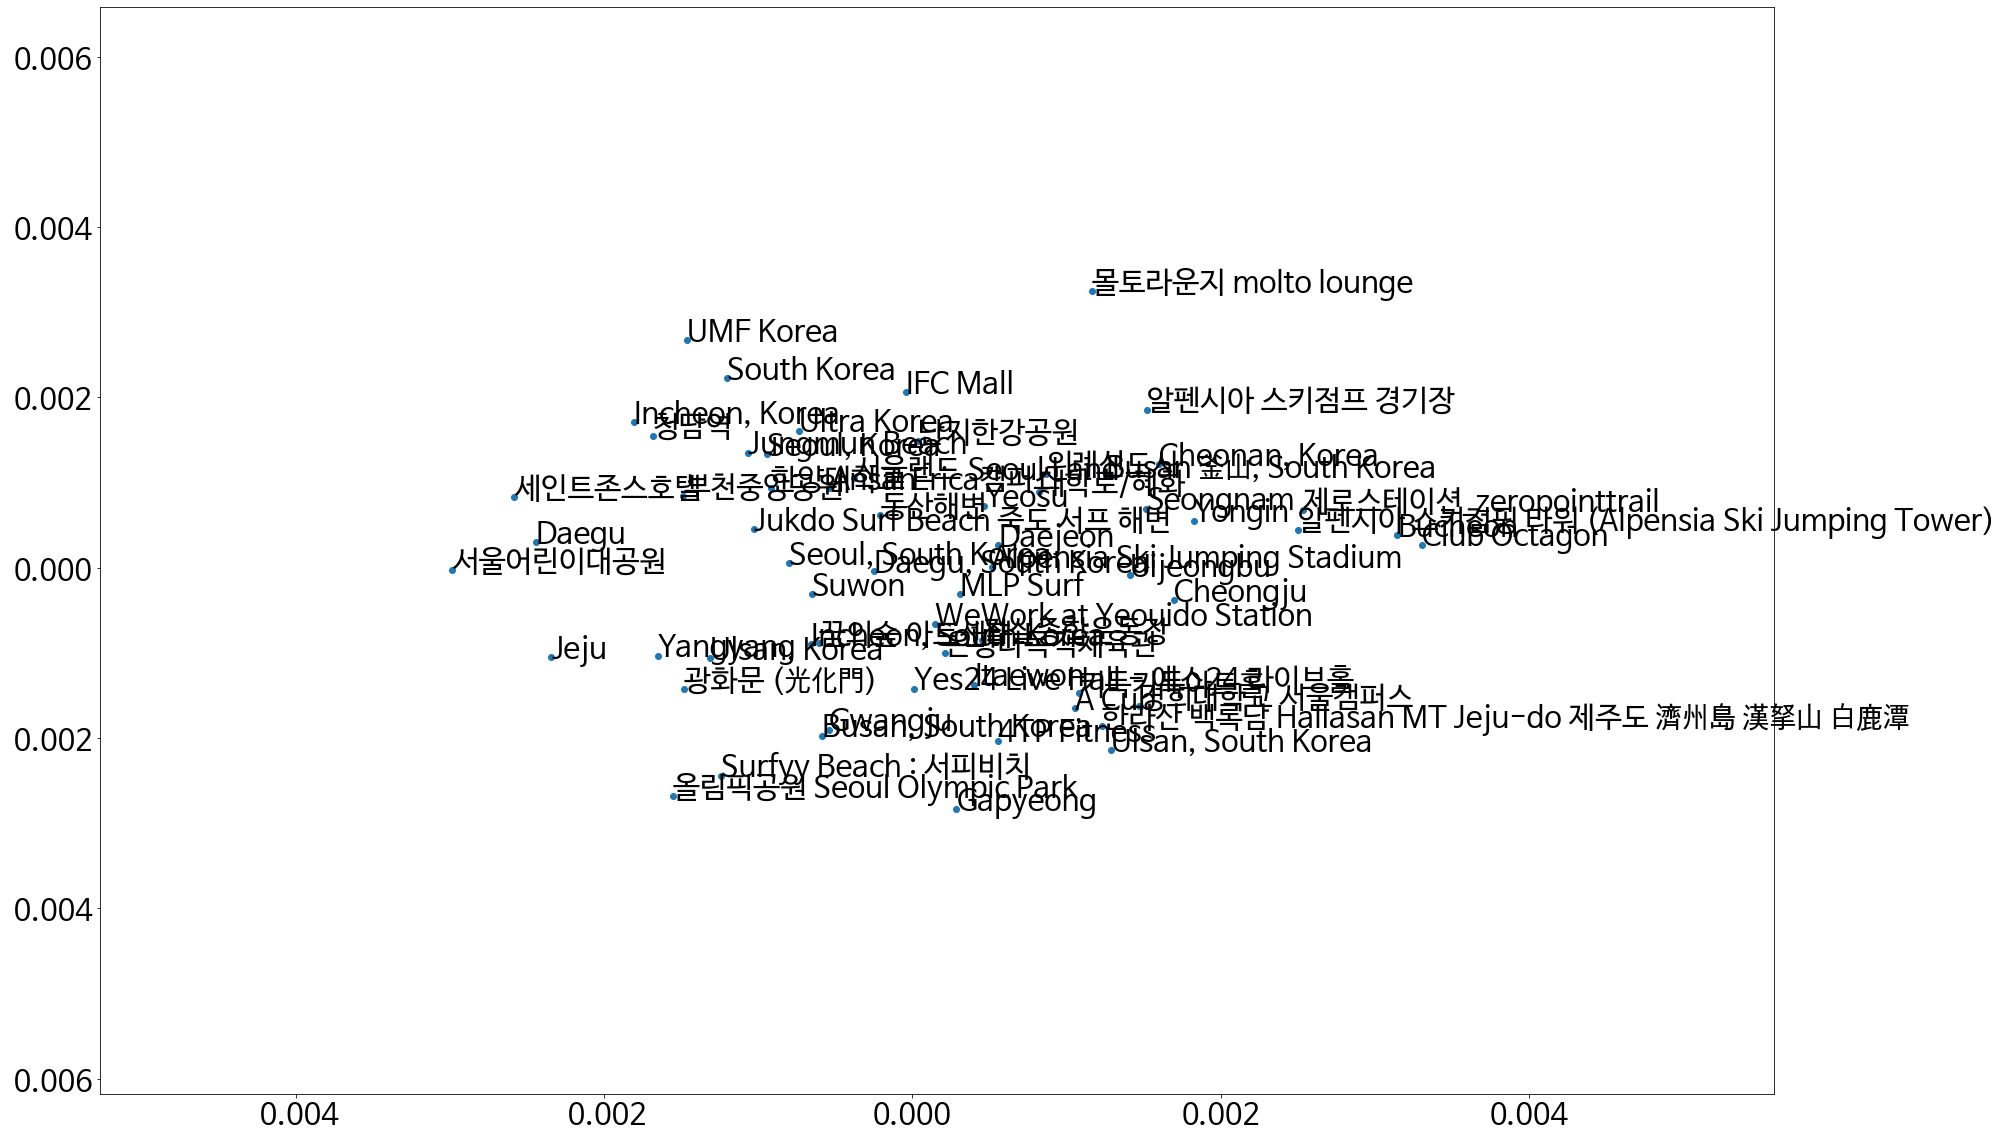

In [83]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))